<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#build the graph
dbpediafile=open("out.dbpedia-similar",'r')
dbgraph=nx.Graph()
edgedouble=0
selfloop=0
edgelist=[]
for row in dbpediafile.readlines():
    x=row.split(" ")
    if len(x)!=2:
      continue
    u,v=int(x[0]),int(x[1])
    if(u>v):u,v=v,u
    if(u==v):selfloop+=1
    if(dbgraph.has_edge(u, v)):edgedouble+=1
    dbgraph.add_edge(u,v)
    edgelist.append((u,v))
    
initial_node_count= dbgraph.number_of_nodes()
initial_edge_count= dbgraph.number_of_edges()
degrees=[]
for i in dbgraph.nodes():
  degrees.append(dbgraph.degree(i))
initial_degree_average=np.mean(degrees)
initial_connected_components= nx.number_connected_components(dbgraph)

print("Initial Graph:")
print("Number of nodes:",initial_node_count)
print("Number of edges:",initial_edge_count)
print("Average node degree:",initial_degree_average)
print("Number of connected components:",initial_connected_components)
print("\nThere is/are",edgedouble,"double edge(s)")
print("There is/are",selfloop,"self loop(s)")


Initial Graph:
Number of nodes: 430
Number of edges: 565
Average node degree: 2.627906976744186
Number of connected components: 95

There is/are 0 double edge(s)
There is/are 1 self loop(s)


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [3]:
nopairs=int(initial_node_count*(initial_node_count-1)/2)
nouncopairs=nopairs-initial_edge_count+edgedouble+selfloop

adjmat=nx.to_numpy_matrix(dbgraph)
adjmat=adjmat.tolist()
uncopairs=[]
for i in range(initial_node_count):
  for j in range(i+1,initial_node_count):
    if adjmat[i][j]==0:
      uncopairs.append((i+1,j+1))

print("Number of unconnected pairs (using Adjacency Matrix):",len(uncopairs))
print("Number of unconnected pairs (using graph metadata):",nouncopairs)

Number of unconnected pairs (using Adjacency Matrix): 91671
Number of unconnected pairs (using graph metadata): 91671


Από τα παραπάνω προκύπτει ότι έχουμε 91671 ζευγάρια τα οποία δεν είναι ενωμένα.

<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [4]:
remoedge=[]
dbcopy=dbgraph.copy()
for edge in edgelist:
  dbcopy.remove_edge(edge[0],edge[1])
  if(dbcopy.number_of_nodes()==initial_node_count and nx.number_connected_components(dbcopy)==initial_connected_components and edge[0]!=edge[1]):
    remoedge.append(edge)
  else:
    #if(edge[0]==edge[1]):continue
    dbcopy.add_edge(edge[0],edge[1])

noremoedge=initial_edge_count-(initial_node_count-initial_connected_components)

print("Number of removable edges (checking each edge):",len(remoedge))
print("Number of removable edges (using graph metadata):",noremoedge)

Number of removable edges (checking each edge): 229
Number of removable edges (using graph metadata): 230


Η διαφορά είναι στην ακμή η οποία επιστρέφει στον κόμβο από τον οποίο ξεκινά (selfloop).

<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [5]:
#dataframe of removable edges (they will function as positive samples)
#...['link'] = 1  #uncomment and complete

#dataframe of unconnected node pairs (they will function as negative samples)
#...['link'] = 0 # uncomment and complete

#merge in one dataframe

#build graph G'=G_reduced
dfedge=uncopairs+remoedge
dfedge.sort()
link=[]
for edge in dfedge:
  if edge in remoedge:link.append(1)
  else:link.append(0)

dbreduced=dbcopy.copy() #already built from before

df = pd.DataFrame({'edge': dfedge, 'link': link})

reduced_node_count= dbreduced.number_of_nodes()
reduced_edge_count= dbreduced.number_of_edges()
degrees=[]
for i in dbreduced.nodes():
  degrees.append(dbreduced.degree(i))
reduced_degree_average=np.mean(degrees)
reduced_connected_components= nx.number_connected_components(dbreduced)

print("Reduced Graph:")
print("Number of nodes:",reduced_node_count)
print("Number of edges:",reduced_edge_count)
print("Average node degree:",reduced_degree_average)
print("Number of connected components:",reduced_connected_components)

df

Reduced Graph:
Number of nodes: 430
Number of edges: 336
Average node degree: 1.5627906976744186
Number of connected components: 95


,edge,link
0,"(1, 2)",1
1,"(1, 3)",1
2,"(1, 4)",1
3,"(1, 6)",0
4,"(1, 7)",0
...,...,...
91895,"(426, 430)",0
91896,"(427, 428)",0
91897,"(427, 429)",0
91898,"(427, 430)",0


Όπως ήταν αναμενόμενο οι κόμβοι και οι συνδετικές συνιστώσες έμειναν σταθερές, αλλά οι ακμές και ο μέσος βαθμός κόμβων μειώθηκαν.

<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

The 9 highest JC values are: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


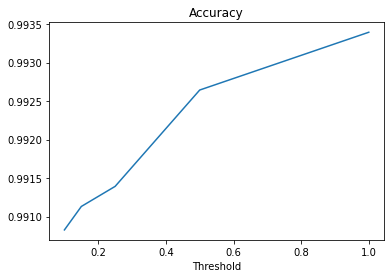

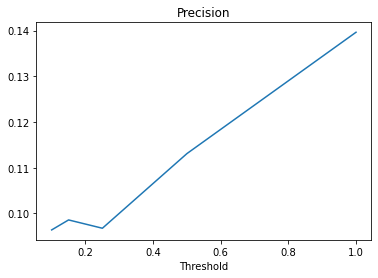

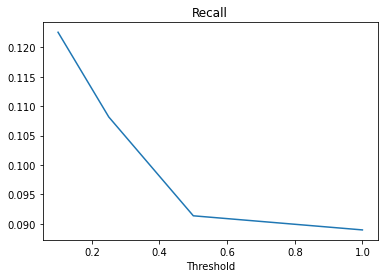

In [7]:
k = 9 #am=el19709 
jcpred = list(nx.algorithms.link_prediction.jaccard_coefficient(dbreduced))
#print(JC_preds)

khighval=[0,0,0,0,0,0,0,0,0]
jcvals=[]
for u,v,p in jcpred:
  jcvals.append(p)
  for i in range(k):
    if(p>khighval[i]):p,khighval[i]=khighval[i],p

print("The",k,"highest JC values are:",khighval)

thresh=[0.1,0.15,0.25,0.5,1]
accs=[]
pres=[]
recs=[]

for t in thresh:
  tval=[]
  for u,v,p in jcpred:

    if(p<t):tval.append(0)
    else: tval.append(1)
  accs.append(accuracy_score(link,tval))
  pres.append(precision_score(link,tval))
  recs.append(recall_score(link,tval))

plt.figure()
plt.plot(thresh,accs)
plt.title("Accuracy")
plt.xlabel("Threshold")
plt.show()
plt.figure()
plt.plot(thresh,pres)
plt.title("Precision")
plt.xlabel("Threshold")
plt.show()
plt.figure()
plt.plot(thresh,recs)
plt.title("Recall")
plt.xlabel("Threshold")
plt.show()

Παρατηρούμε ότι η μετρική Jaccard Coefficient παίρνει τιμές από το 0 μέχρι το 1, και ότι αρκετοί κόμβοι παίρνουν την μέγιστη τιμή. Επίσης παρατηρούμε ότι όσο ανεβαίνει το κατώφλι, οι μετρικές accuracy και precision αυξάνονται ενώ η μετρική recall μειώνεται. Επιπλέον καταλαβαίνουμε ότι οι μεγάλες τιμές του accuracy οφείλονται στο γεγονός ότι το μεγαλύτερο ποσοστό των δεδομένων είναι ασύνδετα ζευγάρια κόμβων, και όχι ακμές τις οποίες διαγράψαμε (99.75%).

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

Για να υπολογίσουμε και να εκφράσουμε τη συσχέτιση μεταξύ των μετρικών Jaccard Coefficient, Preferental Attachment και Resource Allocation, μπορούμε να χρησιμοποιήσουμε την εντολή df.corr() (της βιβλιοθήκης pandas), η οποία υπολογίζει τις συσχετίσεις μεταξύ όλων των στηλών του dataframe, και τις εμφανίζει σε πίνακα. Έτσι θα μπορέσουμε να καταλάβουμε κατά πόσο τα δεδομένα μας είναι συσχετισμένα ή όχι.

In [8]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)
dfcopy=df.copy()
dfcopy=dfcopy.set_index('edge')

In [9]:
#Jaccard Coefficient
dfcopy['Jacc.Coeff']=jcvals

#Preferential Attachment
pratval=[]
for edge in dfedge:
  pratval.append(dbreduced.degree(edge[0])*dbreduced.degree(edge[1]))
dfcopy['Pr. Attachment']=pratval

#Resource Allocation
resall=list(nx.algorithms.link_prediction.resource_allocation_index(dbreduced))
resallval=[]
for u,v,p in jcpred:
  resallval.append(p)
dfcopy['Resource Allocation']=resallval

dfcopy

,link,Jacc.Coeff,Pr. Attachment,Resource Allocation
edge,,,,
"(1, 2)",1,0.0,1,0.0
"(1, 3)",1,0.0,2,0.0
"(1, 4)",1,0.0,1,0.0
"(1, 6)",0,0.0,7,0.0
"(1, 7)",0,0.0,1,0.0
...,...,...,...,...
"(426, 430)",0,0.0,1,0.0
"(427, 428)",0,0.0,2,0.0
"(427, 429)",0,0.0,1,0.0


<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
 
X = dfcopy.drop('link',axis=1)
y = dfcopy['link']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [11]:
classifier = RandomForestClassifier()   

from sklearn.preprocessing import MinMaxScaler 
mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
model = GridSearchCV(classifier, param_grid = parameters) 

In [12]:
model.fit(X_train_scaled,y_train )

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [13]:
predictions = model.predict(X_test_scaled)
print("First",k,"predictions of model:",predictions[0:k])
accuracy=accuracy_score(y_test,predictions)
print("Accuracy of model:",accuracy)

First 9 predictions of model: [0 0 0 0 0 0 0 0 0]
Accuracy of model: 0.9962568008705114


In [14]:
edge1_47 = dfcopy.loc[[(1, 47)]]
edge1_47 = edge1_47.drop('link',axis=1)
edge1_47 = mm_scaler.transform(edge1_47)
predict_proba = model.predict_proba(edge1_47)
print("The probability of nodes 1 and 47 connecting is:",predict_proba[0][1])

The probability of nodes 1 and 47 connecting is: 0.005247511625992548


<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [21]:
#pip install node2vec
from node2vec import Node2Vec   #uncomment
import multiprocessing          #uncomment

#generate walks
node2vec_walker = Node2Vec(dbreduced,p=1.0,q=1.0 ,dimensions=128 ,walk_length=80 ,num_walks=10 , workers=multiprocessing.cpu_count())

#train node2vec model
n2v_model = node2vec_walker.fit(window=10 , min_count=1)

Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [23]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in df['edge']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state = 0)

In [25]:
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)

predictions = classifier.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy of model:",accuracy)

Accuracy of model: 0.99791077257889


Παρατηρούμε ότι η ακρίβεια του μοντέλου είναι μεγαλύτερη από αυτό που χρησιμοποιούμε τις μετρικές Jaccard Coefficient, Preferential Attachment και Resource Allocation.

<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>

In [29]:
x = [((n2v_model.wv[str(i)]+n2v_model.wv[str(j)])/2) for i,j in df['edge']] #average
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state = 0)
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy of model (average operator):",accuracy)

x = [(n2v_model.wv[str(i)]*n2v_model.wv[str(j)]) for i,j in df['edge']] #hadamard
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state = 0)
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy of model (hadamard operator):",accuracy)

x = [(abs(n2v_model.wv[str(i)]-n2v_model.wv[str(j)])) for i,j in df['edge']] #weighted-l1
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state = 0)
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy of model (weighted l-1 operator):",accuracy)

x = [((n2v_model.wv[str(i)]-n2v_model.wv[str(j)])*(n2v_model.wv[str(i)]-n2v_model.wv[str(j)])) for i,j in df['edge']] #weighted-l2
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state = 0)
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy of model (weighted l-2 operator):",accuracy)

Accuracy of model (average operator): 0.99791077257889
Accuracy of model (hadamard operator): 0.99791077257889
Accuracy of model (weighted l-1 operator): 0.9963003264417846
Accuracy of model (weighted l-2 operator): 0.9963003264417846


Από τα παραπάνω αποτελέσματα φαίνεται πως η ακρίβεια του μοντέλου μένει σταθερή για τους operators average και hadamard, ενώ μειώνεται για τους operators weighted-l1 και weighted-l2. Ωστόσο, όλα τα μοντέλα έχουν καλύτερη ακρίβεια από αυτό του ερωτήματος 3.